In [2]:
# provider = IBMProvider()
# backend = least_busy(provider.backends(filters=lambda x:
# x.configuration().n_qubits >= 2
# and not x.configuration().simulator
# and x.status().operational==True))
# print("least busy backend: ", backend)

In [3]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

In [4]:
circuit = QuantumCircuit(q,c)

#prepare target state
circuit.rx(pi/3, q[2])
circuit.draw()



q0_0: ───────────
                 
q0_1: ───────────
      ┌─────────┐
q0_2: ┤ Rx(π/3) ├
      └─────────┘
c0: 3/═══════════

In [5]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector0 = result.get_statevector()

In [6]:
# circuit.h(q[0])

#prepare
circuit.rx(pi/3, q[0])
circuit.rx(-pi/3, q[2])
#prepare EPR pair
circuit.h(q[1])
circuit.cx(q[1], q[2])

#measure with bell state
circuit.cx(q[0], q[1])
circuit.h(q[0])
circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])

#reconstruct
circuit.z(q[2]).c_if(c[0],1)
circuit.x(q[2]).c_if(c[1],1)


# circuit.rx(-pi/3, q[2])
# circuit.h(q[2])
# circuit.measure(q[2], c[2])
circuit.draw()

┌─────────┐                      ┌───┐┌─┐                        
q0_0: ┤ Rx(π/3) ├───────────────────■──┤ H ├┤M├────────────────────────
      └──┬───┬──┘                 ┌─┴─┐└┬─┬┘└╥┘                        
q0_1: ───┤ H ├─────────────────■──┤ X ├─┤M├──╫─────────────────────────
      ┌──┴───┴──┐┌──────────┐┌─┴─┐└───┘ └╥┘  ║    ┌───┐       ┌───┐    
q0_2: ┤ Rx(π/3) ├┤ Rx(-π/3) ├┤ X ├───────╫───╫────┤ Z ├───────┤ X ├────
      └─────────┘└──────────┘└───┘       ║   ║    └─╥─┘       └─╥─┘    
                                         ║   ║ ┌────╨─────┐┌────╨─────┐
c0: 3/═══════════════════════════════════╩═══╩═╡ c0_0=0x1 ╞╡ c0_1=0x1 ╞
                                         1   0 └──────────┘└──────────┘

In [9]:
# for problem 2i
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector1 = result.get_statevector()
inner = np.inner(statevector0, np.conjugate(statevector1))
print(inner)

(0.9999999999999999+3.061616997868382e-17j)


In [10]:
#for problem 2ii
circuit.rx(-pi/3, q[2])
# circuit.h(q[2])
circuit.measure(q[2], c[2])
circuit.draw()

┌─────────┐                      ┌───┐┌─┐                        »
q0_0: ┤ Rx(π/3) ├───────────────────■──┤ H ├┤M├────────────────────────»
      └──┬───┬──┘                 ┌─┴─┐└┬─┬┘└╥┘                        »
q0_1: ───┤ H ├─────────────────■──┤ X ├─┤M├──╫─────────────────────────»
      ┌──┴───┴──┐┌──────────┐┌─┴─┐└───┘ └╥┘  ║    ┌───┐       ┌───┐    »
q0_2: ┤ Rx(π/3) ├┤ Rx(-π/3) ├┤ X ├───────╫───╫────┤ Z ├───────┤ X ├────»
      └─────────┘└──────────┘└───┘       ║   ║    └─╥─┘       └─╥─┘    »
                                         ║   ║ ┌────╨─────┐┌────╨─────┐»
c0: 3/═══════════════════════════════════╩═══╩═╡ c0_0=0x1 ╞╡ c0_1=0x1 ╞»
                                         1   0 └──────────┘└──────────┘»
«                     
«q0_0: ───────────────
«                     
«q0_1: ───────────────
«      ┌──────────┐┌─┐
«q0_2: ┤ Rx(-π/3) ├┤M├
«      └──────────┘└╥┘
«c0: 3/═════════════╩═
«                   2

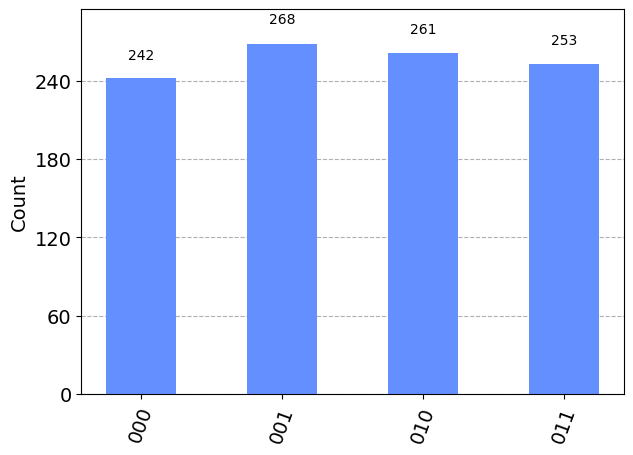

In [11]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)